In [2]:
#Estas son las librerías que vas a necesitar para poder realizar este reto guiado.

#Tratamiento de datos
import pandas as pd
pd.set_option('display.max_columns', None)
#Librerías de visualización
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

C:\Users\juanj\AppData\Local\Temp\ipykernel_17240\1385990647.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 2.1. Cargar los datos y pequeño EDA
2.1.1.Carga el archivo 'bank-limpio-sin-nulos.csv'

2.1.2. Realiza un pequeño EDA en el que obtengas:
- Dimensiones del DF
- Nombre de las columnas
- Número de nulos y tipo de datos de las columnas.
- Descripción de los estadísticos de las columnas.
- Valores únicos de las columnas categóricas y conteo de los mismos.
- Total de nulos y duplicados.

In [3]:
bank = pd.read_csv('bank-limpio-sin-nulos.csv',index_col=0)
bank.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,date,latitude,longitude,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,contact_month,contact_year
0,39.0,housemaid,married,basic 4y,No,No,No,telephone,261,1,unknown,0,nonexistent,1.1,93.994,-36.4,4.8570,5191.0,no,2019-08-02,41.495,-71.233,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,agosto,2019.0
1,57.0,services,married,high school,No,No,No,telephone,149,1,unknown,0,nonexistent,1.1,93.994,-36.4,4.7866,5191.0,no,2016-09-14,34.601,-83.923,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,septiembre,2016.0
2,37.0,services,married,high school,No,Si,No,telephone,226,1,unknown,0,nonexistent,1.1,93.994,-36.4,4.8570,5191.0,no,2019-02-15,34.939,-94.847,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,febrero,2019.0
3,40.0,admin.,married,basic 6y,No,No,No,telephone,151,1,unknown,0,nonexistent,1.1,93.994,-36.4,2.8282,5191.0,no,2015-11-29,49.041,-70.308,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,noviembre,2015.0
4,56.0,services,married,high school,No,No,Si,telephone,307,1,unknown,0,nonexistent,1.1,93.994,-36.4,3.3514,5191.0,no,2017-01-29,38.033,-104.463,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,enero,2017.0


In [4]:
print(f'El dataframe cargado tiene {bank.shape[0]} filas y {bank.shape[1]} columnas.')

El dataframe cargado tiene 43000 filas y 30 columnas.


In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y', 'date', 'latitude', 'longitude', 'income',
       'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth', 'id',
       'contact_month', 'contact_year'],
      dtype='object')

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 42999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                43000 non-null  float64
 1   job                43000 non-null  object 
 2   marital            43000 non-null  object 
 3   education          43000 non-null  object 
 4   default            43000 non-null  object 
 5   housing            43000 non-null  object 
 6   loan               43000 non-null  object 
 7   contact            43000 non-null  object 
 8   duration           43000 non-null  int64  
 9   campaign           43000 non-null  int64  
 10  pdays              43000 non-null  object 
 11  previous           43000 non-null  int64  
 12  poutcome           43000 non-null  object 
 13  emp_var_rate       43000 non-null  float64
 14  cons_price_idx     43000 non-null  float64
 15  cons_conf_idx      43000 non-null  float64
 16  euribor3m          43000 no

In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43000.0,39.943703,9.927421,17.000,32.20000,39.000000,46.00000,98.000
duration,43000.0,257.739279,258.666033,0.000,102.00000,179.000000,319.00000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.000000,3.00000,56.000
previous,43000.0,0.174023,0.497366,0.000,0.00000,0.000000,0.00000,7.000
emp_var_rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.100000,1.40000,1.400
cons_price_idx,43000.0,93.574219,0.576365,92.201,93.07500,93.574219,93.99400,94.767
cons_conf_idx,43000.0,-40.509049,4.637186,-50.800,-42.70000,-41.800000,-36.40000,-26.900
euribor3m,43000.0,3.549873,1.612193,0.634,1.40600,4.225200,4.95900,5.045
nr_employed,43000.0,5166.852602,72.411125,4963.600,5099.10000,5191.000000,5228.10000,5228.100
latitude,43000.0,36.856697,7.225948,24.396,30.61475,36.761000,43.11325,49.384


In [8]:
bank.describe(include='object').T

,count,unique,top,freq
job,43000,12,admin.,10873
marital,43000,3,married,26084
education,43000,8,university degree,12722
default,43000,2,No,42997
housing,43000,3,Si,22498
loan,43000,2,No,36468
contact,43000,2,cellular,27396
pdays,43000,27,unknown,41412
poutcome,43000,3,nonexistent,37103
y,43000,2,no,38156


In [9]:
for columna in bank.select_dtypes(object).columns:
  display(bank[columna].value_counts())

job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
unknown            345
Name: count, dtype: int64

marital
married     26084
single      12105
divorced     4811
Name: count, dtype: int64

education
university degree      12722
high school             9925
basic 9y                6309
professional course     5477
basic 4y                4356
basic 6y                2386
unknown                 1807
illiterate                18
Name: count, dtype: int64

default
No    42997
Si        3
Name: count, dtype: int64

housing
Si         22498
No         19476
unknown     1026
Name: count, dtype: int64

loan
No    36468
Si     6532
Name: count, dtype: int64

contact
cellular     27396
telephone    15604
Name: count, dtype: int64

pdays
unknown    41412
3.0          457
6.0          428
4.0          121
9.0           67
7.0           66
2.0           63
12.0          61
10.0          55
5.0           50
13.0          38
11.0          30
1.0           26
15.0          26
14.0          22
8.0           20
0.0           15
16.0          13
17.0          10
18.0           7
22.0           4
19.0           3
21.0           2
25.0           1
26.0           1
27.0           1
20.0           1
Name: count, dtype: int64

poutcome
nonexistent    37103
failure         4461
success         1436
Name: count, dtype: int64

y
no     38156
yes     4844
Name: count, dtype: int64

date
unknown       248
2018-02-28     95
2016-02-28     94
2015-02-28     92
2017-02-28     89
             ... 
2016-07-02     11
2015-04-14     10
2015-11-20     10
2017-04-04     10
2019-12-21     10
Name: count, Length: 1826, dtype: int64

dt_customer
2012-01-11    79
2012-08-10    79
2012-12-28    75
2012-12-21    72
2012-08-13    72
              ..
2013-02-12    15
2013-06-05    15
2013-09-03    15
2013-10-18    13
2013-10-24    12
Name: count, Length: 1096, dtype: int64

id
089b39d8-e4d0-461b-87d4-814d71e0e079    1
c25b5d31-bb7e-41af-898d-42bf3e479351    1
bfd6bad9-f23a-445a-838e-10ee90110534    1
075b0e72-b5e3-43f4-90cd-29f9090b2b1a    1
482a2d86-c9f0-46b7-9f6f-82c769690d48    1
                                       ..
27e317a2-722c-454d-850b-97b536029c81    1
6d9c117f-af67-4a89-83db-caf514a42374    1
6a229b87-6bf9-4339-9639-b98555df71e7    1
cc891cf7-206c-47f0-804f-20b5b757d5fc    1
993bbbd6-4dbc-4a40-a408-f91f8462bee6    1
Name: count, Length: 43000, dtype: int64

contact_month
noviembre     3603
octubre       3599
julio         3593
marzo         3589
abril         3582
febrero       3577
septiembre    3569
mayo          3547
junio         3538
agosto        3526
enero         3517
diciembre     3512
unknown        248
Name: count, dtype: int64

### Conclusiones de los valor únicos
- **job**: El resultado principal es 'admin', pero no con una diferencia significativa del siguiente.

- **marital**: Sólo tenemos 3 valores (married, single y divorced), el primero de ellos destaca muy por encima del resto.

- **education**: El resultado principal es 'university degree', es destacable que 'illiterate' solo posee 18 registros.

- **default**: Sólo tenemos dos valores (No y Si), el segundo sólo aparece en 3 registros.

- **housing**: Tres valores (No, Sí y Unknown).

- **loan**: Dos valores únicos (No y Sí), el primero notablemente más presente que el segundo.

- **contact**: Dos valores (telephone y cellular). El segundo tiene casi el doble de registros que el primero.

- **poutcome**: Tres valores (nonexistent, failure, success). Tenemos notablemente más datos del primero que del resto.

- **y**: Dos valores (no, yes). Gran cantidad de noes frente a síes.

- **date**: Muchos valores únicos donde el principal es 'Unknown', por ello la columna era de tipo 'object'

- **id_**: Cada valor sólo aparece una vez, es decir, no tenemos dos registros con el mismo identificador.

- **contact_month**: Uno para cada mes y 'Unknown'



In [10]:
print(f'El dataframe cargado tiene {bank.isnull().sum().sum()} nulos y {bank.duplicated().sum()} duplicados.')

El dataframe cargado tiene 0 nulos y 0 duplicados.


### 2.2. Visualización
2.2.1. Identifica la métrica principal de nuestro conjunto de datos. (Es la columna que nos va a dar más información sobre el problema de esta empresa.)

In [11]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y', 'date', 'latitude', 'longitude', 'income',
       'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth', 'id',
       'contact_month', 'contact_year'],
      dtype='object')

La métrica principal del conjunto de datos es la columna "y", dado que esta nos informa de si el cliente a suscrito o no un determinado producto o servicio ofrecido por nuestro banco tras la campaña de marketing directo.

2.2.2. Calcula el porcentaje de usuarios suscritos (pieplot).
- Recuerda que siempre que hacemos un pieplot antes debes hacer un DF con un groupby agrupando por la columna que queremos estudiar.

In [12]:
bank_by_subscribed=bank.groupby(by=bank['y'])['y'].count().reset_index(name='Count')
bank_by_subscribed.head()

,y,Count
0,no,38156
1,yes,4844


In [17]:
fig=px.pie(data_frame=bank_by_subscribed,names='y',values='Count')
fig.update_layout(title='Distribución de las suscripciones')
fig.show()

Aquí podemos observar que la campaña de marketing no está funcionando especialmente bien. Averigüemos por qué está ocurriendo esto.

2.2.3. Realiza una linea temporal con el total de llamadas realizadas a lo largo de la campaña agrupando por mes (line).

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y', 'date', 'latitude', 'longitude', 'income',
       'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth', 'id',
       'contact_month', 'contact_year'],
      dtype='object')

In [24]:
#Generamos el df date donde eliminamos unknowns de la columna date del df bank:
date=bank[bank['date']!='unknown']
#Convertimos la columna date del df date al tipo datetime
date['date']=pd.to_datetime(date['date'],format='%Y-%m-%d')
#Agrupamos las llamadas por día en el df date
date=date.groupby('date')['id'].count().reset_index()
#Sumamos las llamadas por cada mes
date=date.resample('ME',on='date').sum()
date.reset_index(drop=False, inplace=True)

C:\Users\juanj\AppData\Local\Temp\ipykernel_17240\1645867472.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
fig=px.line(data_frame=date,
            x='date',
            y='id',
            text='id', #esto es para pone etiquetas de datos a cada punto (en este caso, el conteo que aparece en la columna denominada id)
            labels=dict(date='Fecha',
                        id='Llamadas')
            )
fig.update_traces(textposition = "top center") #para que las etiquetas de datos aparezcan arriba de cada punto (top) y en el centro.
fig.update_layout(title='Histórico de llamadas al mes',
                  legend = dict(yanchor = "top",
														    y = 0.99,
														    xanchor = "right",
														    x = 0.75))
fig.show()

In [47]:
bank.groupby(by=['contact_month','y'])['contact_month'].count().reset_index(name='Count')

,contact_month,y,Count
0,abril,no,3181
1,abril,yes,401
2,agosto,no,3122
3,agosto,yes,404
4,diciembre,no,3110
5,diciembre,yes,402
6,enero,no,3109
7,enero,yes,408
8,febrero,no,3179
9,febrero,yes,398


Podemos observar como a lo largo del tiempo no ha habido mucho cambio con el número de llamadas realizadas por mes, todos los meses ha habido entre 700 y 800 llamadas.


2.2.4. Comprueba la distribución de llamadas en función del mes del año indicando si el cliente se ha suscrito o no (countplot con agrupación en la columna ‘y)

In [56]:
bank_by_contact_month_y=bank.groupby(by=['contact_month','y'])['contact_month'].count().reset_index(name='Count')
meses=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
meses=pd.Series(meses)
fig=px.bar(data_frame=bank_by_contact_month_y,
           x='contact_month',
           y='Count',
           color='y',
           category_orders={'contact_month': meses},
           barmode='group',
           labels=dict(contact_month='Mes',Count='Llamadas',y='¿Suscrito?'))
fig.show()

Aquí podemos ver que la distribución de llamadas ha sido bastante uniforme a lo largo del tiempo. Además podemos ver que no hay diferencias significativas entre la subscripción o no en función del mes.

2.2.5. Haz un subplot donde haya 4 gráficos de barras de las columnas 'duration', 'numwebvisitsmonth', 'pdays' e ‘income’, un stripplot de la columna ‘campaign’ y un violinplot de la columna ‘age’.
- En todas las gráficas queremos relacionar las variables con la columna ‘y’

C:\Users\juanj\AppData\Local\Temp\ipykernel_17240\3349894955.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Edad del cliente')

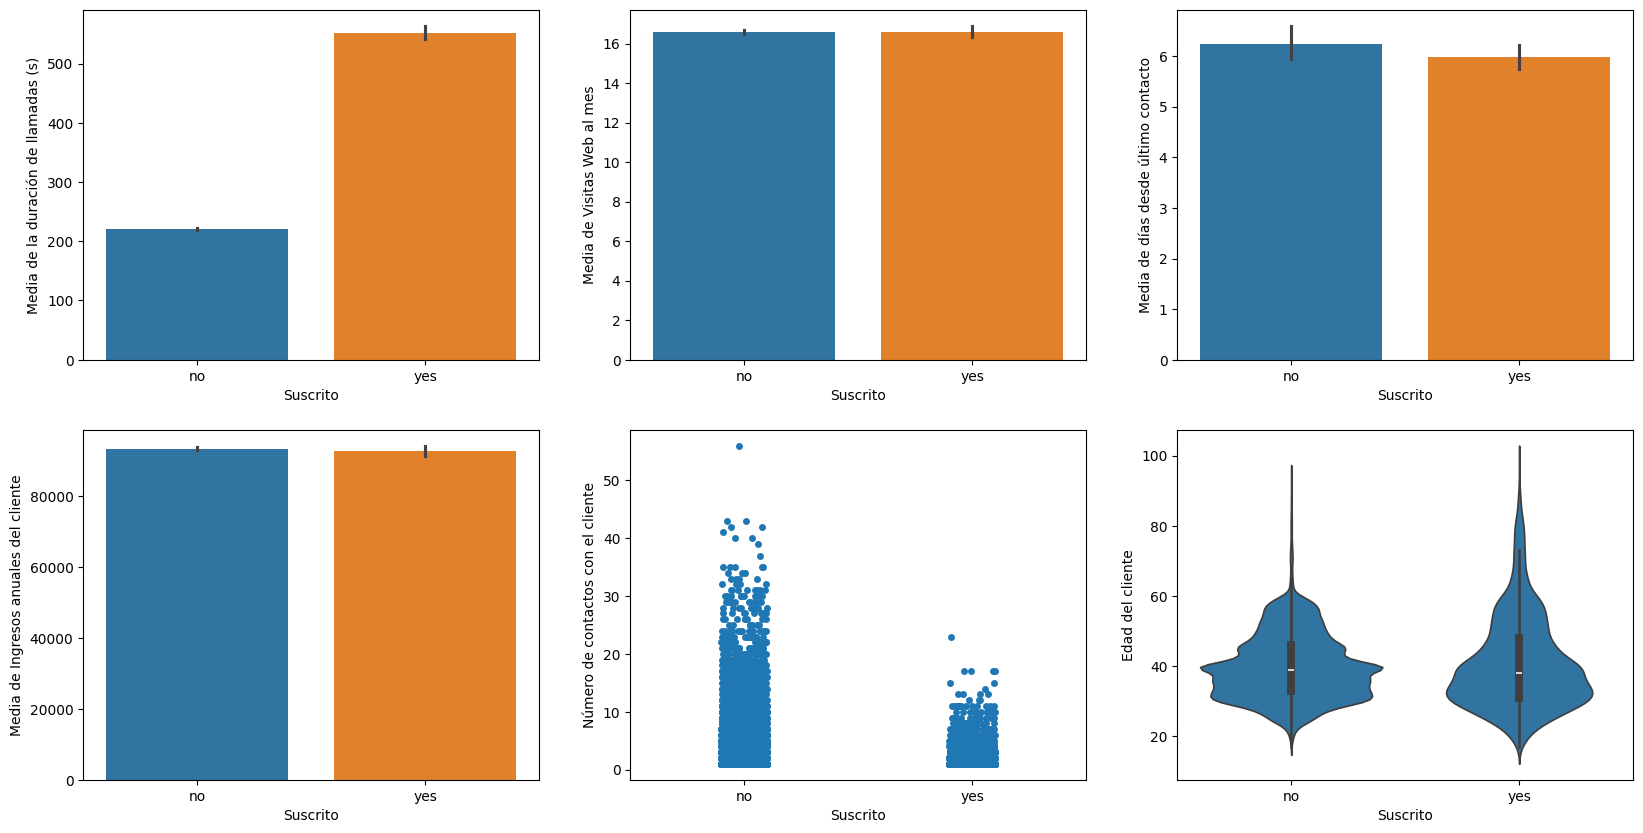

In [89]:
fig, axes=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
fig.add_subplot(sns.barplot(data=bank,x='y',y='duration',hue='y',ax=axes[0,0]))
axes[0,0].set_xlabel('Suscrito')
axes[0,0].set_ylabel('Media de la duración de llamadas (s)')
fig.add_subplot(sns.barplot(data=bank,x='y',y='numwebvisitsmonth',hue='y',ax=axes[0,1]))
axes[0,1].set_xlabel('Suscrito')
axes[0,1].set_ylabel('Media de Visitas Web al mes')

pdays=bank[bank['pdays']!='unknown']
pdays['pdays']=pdays['pdays'].apply(lambda x:float(x))

fig.add_subplot(sns.barplot(data=pdays,x='y',y='pdays',hue='y',ax=axes[0,2]))
axes[0,2].set_xlabel('Suscrito')
axes[0,2].set_ylabel('Media de días desde último contacto')
fig.add_subplot(sns.barplot(data=bank,x='y',y='income',hue='y',ax=axes[1,0]))
axes[1,0].set_xlabel('Suscrito')
axes[1,0].set_ylabel('Media de Ingresos anuales del cliente')
fig.add_subplot(sns.stripplot(data=bank,x='y',y='campaign',ax=axes[1,1]))
axes[1,1].set_xlabel('Suscrito')
axes[1,1].set_ylabel('Número de contactos con el cliente')
fig.add_subplot(sns.violinplot(data=bank,x='y',y='age',ax=axes[1,2]))
axes[1,2].set_xlabel('Suscrito')
axes[1,2].set_ylabel('Edad del cliente')

2.2.6. Crea un subplot con dos pieplot que nos muestre la distribución del estado civil del cliente (‘marital’) en función de las suscripciones (‘y’).

In [99]:
bank_groupby_y_marital=bank.groupby(by=['y','marital'])['id'].count().reset_index(name='count')
bank_groupby_yno_marital=bank_groupby_y_marital[bank_groupby_y_marital['y']=='no']
display(bank_groupby_yno_marital)
bank_groupby_yyes_marital=bank_groupby_y_marital[bank_groupby_y_marital['y']=='yes']
display(bank_groupby_yyes_marital)

,y,marital,count
0,no,divorced,4321
1,no,married,23416
2,no,single,10419


,y,marital,count
3,yes,divorced,490
4,yes,married,2668
5,yes,single,1686


Text(0.5, 1.0, 'Distribución estado civil entre SUSCRITOS')

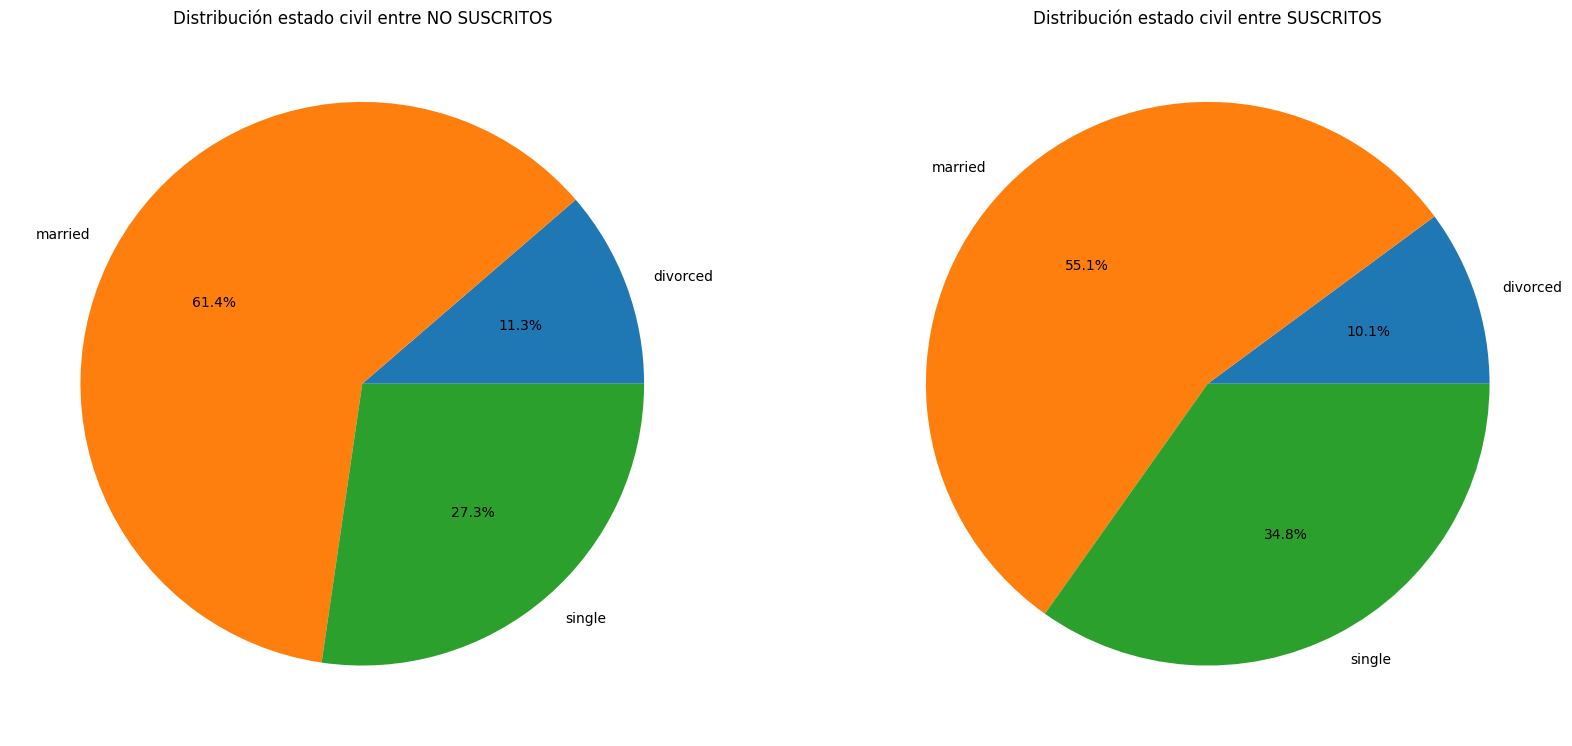

In [117]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
axes[0].pie(x=bank_groupby_yno_marital['count'],labels=bank_groupby_yno_marital['marital'],autopct='%1.1f%%')
axes[0].set_title('Distribución estado civil entre NO SUSCRITOS')
axes[1].pie(x=bank_groupby_yyes_marital['count'],labels=bank_groupby_yyes_marital['marital'],autopct='%1.1f%%')
axes[1].set_title('Distribución estado civil entre SUSCRITOS')

Aquí podemos observar que la proporción cambia un poco en el caso de los usuarios solteros y casados. Siendo el porcentaje de solteros no suscritos un 27% y el de suscritos un 35%. Mientras que en los casados no suscritos tenemos un 61% y suscritos un 55%

2.2.7. Haz lo mismo que en el ejercicio anterior pero ahora con la columna ‘contact’.

In [115]:
bank_groupby_y_contact=bank.groupby(by=['y','contact'])['id'].count().reset_index(name='count')
bank_groupby_yno_contact=bank_groupby_y_contact[bank_groupby_y_contact['y']=='no']
display(bank_groupby_yno_contact)
bank_groupby_yyes_contact=bank_groupby_y_contact[bank_groupby_y_contact['y']=='yes']
display(bank_groupby_yyes_contact)

,y,contact,count
0,no,cellular,23357
1,no,telephone,14799


,y,contact,count
2,yes,cellular,4039
3,yes,telephone,805


Text(0.5, 1.0, 'Distribución tipo de contacto entre SUSCRITOS')

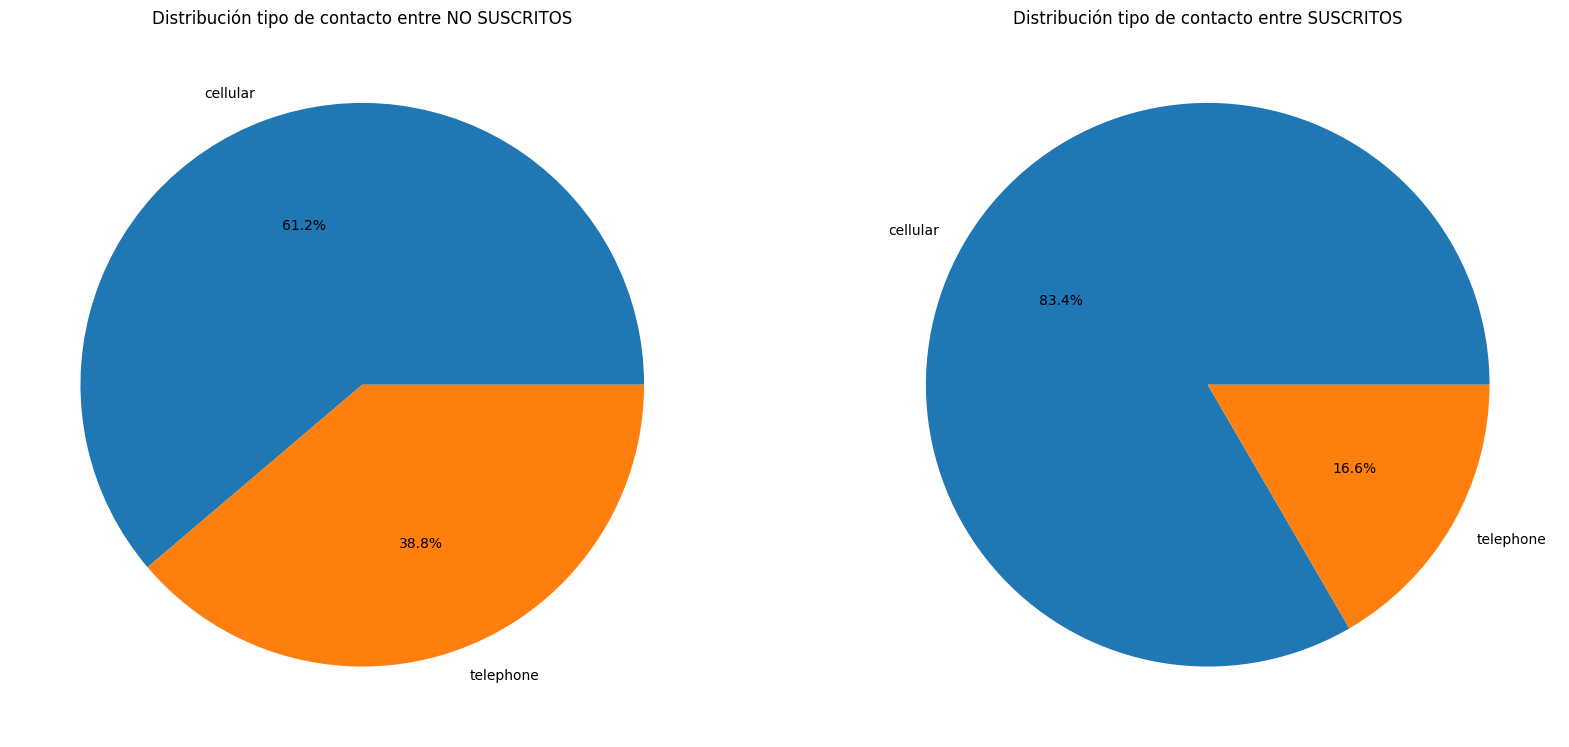

In [116]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
axes[0].pie(x=bank_groupby_yno_contact['count'],labels=bank_groupby_yno_contact['contact'],autopct='%1.1f%%')
axes[0].set_title('Distribución tipo de contacto entre NO SUSCRITOS')
axes[1].pie(x=bank_groupby_yyes_contact['count'],labels=bank_groupby_yyes_contact['contact'],autopct='%1.1f%%')
axes[1].set_title('Distribución tipo de contacto entre SUSCRITOS')

2.2.8. Crea un violinplot con la distribución de la forma de contacto ‘contact’, la edad ‘age’ y la suscripción ‘y’

In [127]:
fig=px.violin(data_frame=bank,
              x='contact',
              y='age',
              box=True,
              color='y',
              labels=dict(contact='Tipo de contacto',age='Edad del cliente',y='¿Suscrito?'))
fig.show()

Observamos cómo el móvil está más estandarizado entre los usuarios de una edad de unos 30 años mientras que el pico de usuarios de teléfono lo tenemos en los usuarios de 40. En el caso de móvil podemos ver cómo los usuarios de por debajo de 30 años es más fácil que decidan suscribirse. Mientras que en los usuarios de teléfono eso ocurre entre los 30 y los 40.

2.2.9. Realiza un histplot con la cantidad de llamadas realizadas en función de los contactos previos durante la campaña (‘previous’). Agrupa por la columna ‘y’.

In [133]:
fig=px.histogram(data_frame=bank,
                 x='previous',
                 color='y',
                 barmode='group',
                 labels=dict(previous='Número de contactos previos a la campaña'))
fig.show()

Aquí podemos ver que a la mayoría de los usuarios no habíamos contactado previamente y que cuando esto ocurre lo más probable es que no decidan suscribirse. Vamos a eliminar esta columna para poder visualizar mejor el resto de los casos.

In [134]:
previous=bank[bank['previous']>0]
fig=px.histogram(data_frame=previous,
                 x='previous',
                 color='y',
                 barmode='group',
                 labels=dict(previous='Número de contactos previos a la campaña'))
fig.show()

Aquí podemos ver cómo a medida que más vamos contactando con los usuarios repetidas veces la diferencia entre la gente que se suscribe y la que no se va disminuyendo.

2.2.10. Crea un subplot con dos pieplot que nos muestre la forma con la que se contactó con el cliente (‘contact’’) en función de las suscripciones (‘y’).

In [144]:
bank_yes_poutcome=bank[bank['y']=='yes'].groupby('poutcome')['id'].count().reset_index(name='count')
display(bank_yes_poutcome)
bank_no_poutcome=bank[bank['y']=='no'].groupby('poutcome')['id'].count().reset_index(name='count')
display(bank_no_poutcome)

,poutcome,count
0,failure,635
1,nonexistent,3271
2,success,938


,poutcome,count
0,failure,3826
1,nonexistent,33832
2,success,498


In [147]:
fig=make_subplots(rows=1,
                  cols=2,
                  subplot_titles=['NO SUSCRITOS','SUSCRITOS'],
                  specs = [[{"type": "domain"}, {"type": "domain"}]])
fig.add_trace(go.Pie(labels=bank_no_poutcome['poutcome'],values=bank_no_poutcome['count']),row=1,col=1)
fig.add_trace(go.Pie(labels=bank_yes_poutcome['poutcome'],values=bank_yes_poutcome['count']),row=1,col=2)
fig.show()

Aquí podemos ver la gran diferencia entre las personas que ya se habían suscrito con la campaña anterior. En estos casos los usuarios deciden NO volver a suscribirse.

Las conclusiones que sacamos con este EDA son:

- La campaña no está funcionando, ya que casi el 90% de las llamadas no son fructíferas y los clientes no se están suscribiendo.
- El número de llamadas a lo largo del tiempo no ha fluctuado demasiado, además tenemos una distribución uniforme del número de llamadas por mes, así como el reparto entre suscritos y no suscritos.
- Cuánto más larga es la llamada más fácil es que el cliente decida aceptar.
- A partir de los 10 contactos con el cliente durante la misma campaña muy probablemente no decidan suscribirse. Sin embargo, si los contactos se han realizado antes de esta campaña los resultados se invierten. 
- Los usuarios a los que más le está convenciendo la campaña son los que tienen más de 60 años, además llegamos más a los usuarios casados frente a los solteros.
- Principalmente las suscripciones vienen de las llamadas realizadas a teléfonos frente a la de los móviles. Esto puede ser debido a que nos marquen la llamada como spam o que es más dificil que la gente atienda una llamada realizada por un número que no conoce desde el móvil.
- Por último, la gente que en la anterior campaña se suscribieron tiene una alta tasa de no suscripciones.
